##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</style></h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 2 DO LABORATORIUM 2</style></h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</style></h1>
    <h1 style = "font-size:24px">Klasyfikacja nadzorowana</style></h1>
    <h1 style = "font-size:24px">Szymon Zaporowski</style></h1>
    <h3 style = "font-size:21px">Klasyfikacja z użyciem Drzew Decyzyjnych i algorytmu Lasu Losowego - przykłady</h3>
    <h3 style = 
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# 1. Przykład 2

Drzewa Decyzyjne (ang, Decission Trees) są wszechstronnymi algorytmami uczenia maszynowego, które mogą być wykorzystywane zarówno jako klasyfikatory jak i do zadań regresji. Można je wykorzystać do tworzenia zaawansowanych modeli zdolnych do wykonywania zadań ze złożonymi zbiorami danych.
Drzewa decyzyjne są składowymi elementami algorytmu losowych lasów (ang. Random Forest)

In [139]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Do przedstawienia idei stojącej za mechanizmem działania algorytmu drzewa decyzyjnego wykorzystamy prosty przykład z użyciem datasetu iris.
W tym przykładzie skupimy się na parametrze max_depth oznaczającego maksymalne zagłebienie drzewa.


```
tree_clf = DecisionTreeClassifier(max_depth=1)
```

Zobaczmy jaki będzie wynik wykonania takiego kodu.
Przy użyciu modułu export_graphviz oraz pydot tworzymy graficzną reprezentację drzewa, która zostaje zapisana na dysku zgodnie z podaną nazwą.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X= iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X,y)

from sklearn.tree import export_graphviz
import pydot
export_graphviz(
    tree_clf,
    out_file='drzewo.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded = True,
    filled=True
)
(graph, ) = pydot.graph_from_dot_file('drzewo.dot')# Zapis do pliku png
graph.write_png('drzewo.png')

Zobaczmy jak wygląda drzewo po wykonaniu kodu:


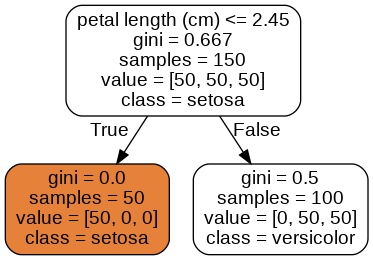

W głównym weźlę czyli korzeniu na wysokości 0 zostało zadane pytanie - czy długość płatka jest mniejsza niż 2,45 cm. Jeśli warunek jest spełniony znajdujemy się w liściu na wysokości 1. Drzewo przewiduje iż znajduje się to klasa setosa.
<p>
A co w przypadku, gdfy warunke nie zostaje spełiony i znajdujemy się w prawym liściu? Wskazana klasa to versicolor.

Teraz pozostaje zrozumieć czym są wszystkie pozostałe atrybuty znajdujące się w drzewie.


> Atrybut *sample* odpowiada za liczbę próbek uczących wyznaczonych dla danego węzła.<P>
> Atrubut *value* wskazuje jak wiele przykładów uczących z każdej klasy należy do danego węzła lub liścia. W przypadku liścia po lewej stronie mamy 50 próbek należących do klasy *setosa* oraz po 0 próbek należących do pozostałych klas. W przypadku prawego liścia jest 50 próbek należacych do klasy *versicolor* i 50 należacych do klasy *virginica*. 

Widać teraz, że mamy tylko 2 liście i aż 3 klasy. Do tego jeden z liści zawiera po tyle samo próbek dwóch klas. Oznacza to, iż drzewo jest za płytkie i poziom zagłębienia oznaczany parametrem *max_depth* powinien zostać zwiększony.

Zanim do tego przejdziemy pozostaje do rozszyfrowania ostatni parametr: *gini* - jest on rozumiany jako miara zanieczyszczenia. Oznacza to, iż będzie wynosił 0 jeśli wszystkie próbki znajdujące się w danym węźle czy liściu będą przynależeć tylko do jednej klasy. Dobrym przykładem jest tutaj lewy liść dla którego wartość parametru *gini* jest równa 0.



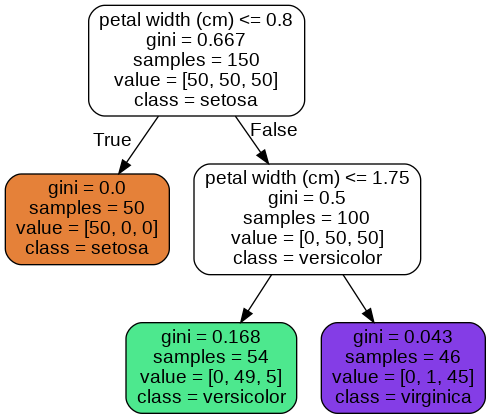

Widzimy, że zmieniło się pytanie zadawane w korzeniu oraz pojawiło się pytanie węźle na poziomie 1 oraz dwa dodatkowe liście wychodzące z tego węzła.
Zmieniły się również wartości atrybutów, zarówno *samples* jak i *gini*.

W jaki sposób szacować prawdopodobieństwo przynależności próbki do danej klasy dla drzew decyzyjnych?<P>
Wystarczy użyć  `.predict.proba()` podając jako agrumenty wartości danej próbki.
W wyniki otrzymane zostaną prawdopodobieństwa przynależności do klas występujących w danym drzewie. <p>
Z wykorzystaniem polecenia `predict()` i podając wartość otrzyma się konkretną przynależnośc do klasy. Wystarczy odpalić poniższą komórkę i zobaczyć jakie zostaną otrzymane wyniki.


In [79]:
print(tree_clf.predict_proba([[8,0.5]]))
tree_clf.predict([[8,0.5]])

[[0.         0.33333333 0.66666667]]


array([2])

Teraz spróbujemy wykonać takie same operacje dotyczace tworzenia klasyfikatora, ale z wykorzystaniem algorytmu Random Forest.

Do tego celu wykorzystamy funkcję:
```
RandomForestClassifier(max_depth=2, random_state=0)
```

Więcej informacji dotyczących parametrów tej funkcji można znaleźć na stronie:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier


In [140]:
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=109)


clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

#print(clf.score)
#print(clf.predict([[0, 0, 0, 0]]))
  
tree = clf .estimators_[5] 
export_graphviz(tree, out_file = 'tree.dot', feature_names = dataset.feature_names, rounded = True, precision = 1)# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file
graph.write_png('tree.png')

y_pred= clf.predict(X_test)
print("Wektor etykiet dla danych testowych:",y_test)
print("Wektor etykiet wytypowany przez klasyfikator:",y_pred)
print('Accuracy:')
accuracy_score(y_test, y_pred)

Wektor etykiet dla danych testowych: [2 1 2 0 2 1 0 2 1 2 2 0 1 0 0]
Wektor etykiet wytypowany przez klasyfikator: [2 1 2 0 2 1 0 2 1 2 2 0 1 0 0]
Accuracy:


1.0

Jak widać wektory zgadzają się ze sobą, a jak wygląd graficzna reprezentacja grafu takiego drzewa?
Wystarczy spojrzeć poniżej aby się przekonać. <p>
Jak widać nie zmieniło się wiele w prównaniu z algorytmem drzewa decyzyjnego.

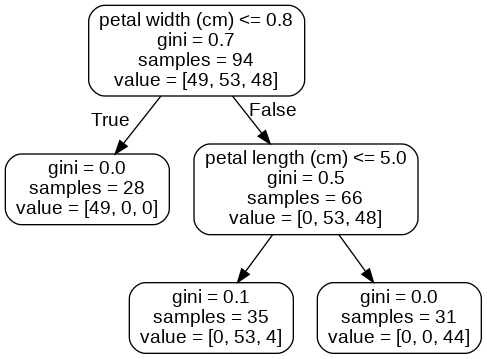

Skoro mamy za sobą wprowadzenie do drzew decyzyjnych, przejdziemy do konkretniejszych przykładów.
W tym celu wykorzystamy dataset diabetes, który jest udostępniony na stronie Kaggle na licencji C0.

In [98]:
import pandas as pd

features = pd.read_csv('diabetes.csv')
features.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Wyśtwitlamy kształt naszego datasetu, mamy 8 cech i etykietę na końcu,w  sumie drugi wymiar to 9.

In [99]:
print('The shape of our features is:', features.shape)
print('our features is:', features)

The shape of our features is: (768, 9)
our features is:      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


Testowo sprawdzamy statystykę danych z użyciem funkcji:
```
#features.describe() 
```



In [100]:
features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Dokonujemy przekształceń z wykorzystaniem biblioteki numpy, musimy rozdzelić etykiety od danych.

In [101]:
# Wykorzystujemy bibliotekę numpy aby zamienić dane na tablice numpy
import numpy as np# 
labels = np.array(features['Outcome'])# Usuwamy etykiety ze zbioru parametrów  
# axis 1 odnosi sie do kolumn 
features = features.drop('Outcome', axis = 1)#  Zostawiamy nazwy etykiet do wykorzystania później
feature_list = list(features.columns)# Właściwa konwersja na tablice numpy
features = np.array(features)

Standardowy podział danych z wykorzystaniem funkcji:
```
train_test_split()
```

In [102]:
from sklearn.model_selection import train_test_split# Podział danych
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

Sprawdzmay jaki kształt mają dane po podziale, czy wartości dla etykiet zgadzają się z danymi.

In [103]:
print('Kształt danych treningowych:', train_features.shape)
print('Kształt etykiet trenignowych:', train_labels.shape)
print('Kształt danych testowych:', test_features.shape)
print('Kształt etykiet testowych:', test_labels.shape)

Training Features Shape: (576, 8)
Training Labels Shape: (576,)
Testing Features Shape: (192, 8)
Testing Labels Shape: (192,)


Dokonujemy właściwego importu modelu oraz trenignu.

In [143]:
# Import wykorzystywanego modelu
from sklearn.ensemble import RandomForestClassifier# Wykorzystujemy algorytm Random Rofest
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(train_features, train_labels);
predictions_forest = rf.predict(test_features)
print('Accuracy:')
accuracy_score(test_labels, predictions_forest)

Accuracy:


0.734375

Wynik accuracy nie jest najlepszy, ale w tej chwili nie jest to najistoniejsze.
Tworzymy graf wytrenowanego klasyfikatora. Najelpiej podejrzeć go otwierając po lewej stronie okno z danymi i pobierając plik randomtree.png

In [144]:
# Import bibliotek niezbędnych do wizualizacji
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]# Wybór jednego z drzew z lasu
export_graphviz(tree, out_file = 'randomtree.dot', feature_names = feature_list, rounded = True, precision = 1)# Tworzymy graf z wykorzystaniem pliku dot
(graph, ) = pydot.graph_from_dot_file('randomtree.dot')# Zapis do pliku png
graph.write_png('randomtree.png')

Ze względu na wielkość otrzymanego drzewa dokonujemy zmniejszenia modelu. Powtarzamy czynności dla pliku small_tree.png

In [145]:
# Zmniejszamy rozmiar drzewa do maksymalnej złożoności 3 poziomów
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)# Extract the small tree
tree_small = rf_small.estimators_[5]# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1) 
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

Algortym losowych lasów posiada bardzo ciekawą właściwość. Z jego wykorzystaniemj można w łatwy sposób dokonać pomiaru względnej istotności każdej z cech zbioru. W przypadku modułu scikit-learn pomiar istotności to miara w jakim stopniu węzły we wszystkich drzewach w lesie zmniejszają zanieczyszczenie korzystając z tej cechy (zmiana atrybutu *gini*).
Gdyby spojrzeć na to z matematycznego punktu widzenia jest to nic innego jak średnia ważona przy założeniu, że waga każdego z węzłów jest równa liczbie powiązanych z danym węzłem próbek treningowych. Bardzo przydatną cechą w module scikit-learn jest fakt, iż automatycznie obliczany jest wynik dla każdej cechy po wykonaniu treningu i dodatkowo jest on skalowany przez co suma wszystkich istotności wynosi 1.

Wykorzystamy tę funkcję drzew losowych do obliczenia najistotniejszych cech w zbiorze.

In [146]:
# Liczymy istotność parametrów z wykorzystaniem algorytmu losowych lasów
importances = list(rf.feature_importances_)# Lista krotek ze zmiennymi oraz istotnościami 
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]#  Sortowanie istotności cech zaczynając od najbardziej istotnej cechy
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Wypisanie najistotniejszych cech wraz z istotnością
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Glucose                        Importance: 0.28
Variable: BMI                            Importance: 0.16
Variable: Age                            Importance: 0.14
Variable: DiabetesPedigreeFunction       Importance: 0.12
Variable: BloodPressure                  Importance: 0.09
Variable: Pregnancies                    Importance: 0.07
Variable: SkinThickness                  Importance: 0.07
Variable: Insulin                        Importance: 0.07


Jak widać najistotniejszą cechą jest wartość glukozy, co w sumie nie powinno dziwić w przypadku klsyfikowania cukrzycy. Pozostałe cechy nie odbiegają od siebie istotnością w tak znaczący sposób. <P>
Można teraz sobie zadać pytanie, co by było gdyby dokonać treningu wykorzystując tylko najisotniejsze cech? Czy wyniki będą lepsze czy gorsze? A może czas treningu ulegnie zmianie?

In [147]:
# Tworzymy nową instancję algorytmu losowego lasu wykorzystując tylko najistoniejsze cechy

rf_most_important = RandomForestClassifier(n_estimators= 100, random_state=42)# Extract the two most important features
important_indices = [feature_list.index('Glucose'), feature_list.index('BMI')] # wybieramy tylko 2 najistotnijeszcze cechy - glukozę i BMI
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]# Trening
rf_most_important.fit(train_important, train_labels)# Predykcja wyników
predictions = rf_most_important.predict(test_important)
print('Accuracy:')
accuracy_score(test_labels, predictions)

Accuracy:


0.7291666666666666

Jak widać wartość miary accuracy pełnego modeli i trenowanego tylko z użyciem dwóch najistotniejszych cech nie odbiega od siebie znacząco. Oznacza to, iż lepiej korzystać z modelu, który jest prostszy obliczeniowo.
<P>
Zobaczmy jeszcze jak wyglądają pozostałe metryki, w tym celu skorzystajmy z funkcji:

```
# classification_report()
```
Ta funkcja wylicza wartośći miar f1, precison i recall dla poszczególnych klas oraz podaje liczbę sklasyfikownaych przypadków w postaci pola *support*.
Dodatkow wyliczane są średnie wartośći macro czyli uśrednianie średniej niezbalandsowanej dla każdej z etykiet oraz średniej ważonej, która uwzględnia ilość danych dla każdej z klas.



In [133]:
classification_report(test_labels, predictions, output_dict= True, target_names=[0,1])

{0: {'f1-score': 0.7854251012145749,
  'precision': 0.782258064516129,
  'recall': 0.7886178861788617,
  'support': 123},
 1: {'f1-score': 0.6131386861313869,
  'precision': 0.6176470588235294,
  'recall': 0.6086956521739131,
  'support': 69},
 'accuracy': 0.7239583333333334,
 'macro avg': {'f1-score': 0.6992818936729809,
  'precision': 0.6999525616698292,
  'recall': 0.6986567691763874,
  'support': 192},
 'weighted avg': {'f1-score': 0.7235096707940541,
  'precision': 0.7231009843453511,
  'recall': 0.7239583333333334,
  'support': 192}}

Dla pewności można wykonać obliczenie macierzy pomyłek, w formie kodu.

In [134]:
confusion_matrix(test_labels, predictions)

array([[97, 26],
       [27, 42]])

Oraz w znanej z wcześniejszego przykładu formie graficznej.

Text(0.5, 257.44, 'Etykieta przewidziana przez model')

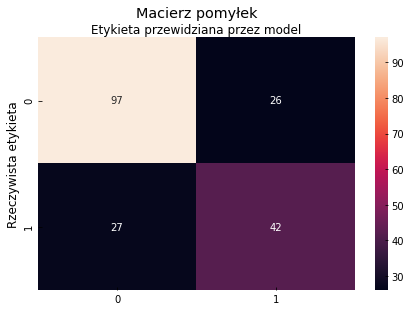

In [137]:
import seaborn as sns
#Tworzenie macierzy pomyłek dla testowanego klasfikatora
cnf_matrix = confusion_matrix(test_labels, predictions)
cnf_matrix
class_names=[0,1] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# tworzenie mapy cieplnej
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Etykieta przewidziana przez model')

Dodatkowo, można wykreślić wykres istotności cech z wykorzystaniem biblioteki matplotlib.

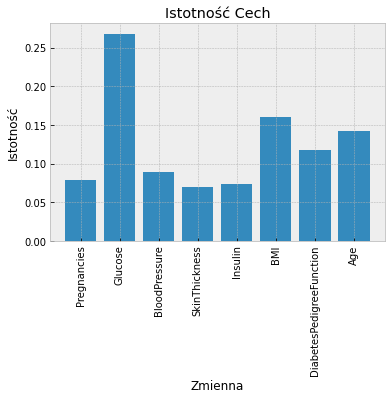

In [138]:
import argparse
parser = argparse.ArgumentParser()
parser.parse_args([])

import matplotlib.pyplot as plt

plt.style.use('bmh')
x_values = list(range(len(importances)))# Tworzenie wykresu słupkowego
plt.bar(x_values, importances, orientation = 'vertical')# Podpisy osi dla osi X
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Istotność'); 
plt.xlabel('Zmienna'); 
plt.title('Istotność Cech');

<p><b>Zadanie 1</b></p>
Korzystając z pokazanych przykładów dopisać funkcje raportujące wyniki metryk i porównać z tymi w przykładzie.

<p><b>Zadanie 2</b></p>
Korzystając z innych parametrów niż *max_depth*, sprawdzić ich wpływ działania na klasyfikator w obu przedstawionych w przykładzie datasetach.
Sprawdzić parametry: 

> *min_samples_split* - odpowiadający za minimalną liczbe próbek znajdujących się w węźle zanim zostanie podzielony

>*min_samples_leaf* - minimalna liczbę próbek znajdujących się w liściu

>*max_leaf_nodes* - maksymalna liczba liści

>*max_features* - maksymalna liczba cech stosowana do dzielenia węzłów


<p><b>Zadanie 3</b></p>

Zamienić domyślny wskaźnik zanieczysczenia *gini* na *entropy* dla klasyfikatorów w obu zbiorach. Czy zaobserowano znaczącą różnicę w działaniu klasyfikatorów?

<p><b>Zadanie 4</b></p>

Wykorzystując algorytm istotnośći cech wytrenować klasyfikator zawierający:



*   4 najlepsze cechy
*   2 najgorsze cechy

Jak zmiana tych parametów wpłyneła na metryki?

